## *Movie Data Analysis - Assigment For PG Diploma Data Science (Upgrad)*

##### Objective :
*Analyze the data on Move assignment to find the movies with highest ratings, top directors, good movies in different genres, etc*

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

### *Task 1 : Reading and Inspection*
  ##### 1.1 Import and Read 
  *Import and read the movies data from 'Movie+Assignmnet+Data.csv' and store it in pandas dataframe*

In [36]:
movies = pd.read_csv('Movie+Assignment+Data.csv')

##### 1.2 Inspect the Dataframe
*Inspect the data frame for columns, rows, shapes,variable types, etc*

In [37]:
# defines the size of df - 28 columns and 5043 rows
print(movies.shape)

(5043, 28)


In [38]:
# defines every column with its non-null no of row count, data type
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [39]:
# Prints the first 5 record of movies_df
print(movies)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

### *Task 2: Cleaning the Data*

##### *2.1: Inspect Null values*

*Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.*

In [40]:
# print the null-count for each column
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [41]:
#print the no of rows which has all the values null
movies.isnull().all(axis=1).sum()

0

There are no rows having all the values null. If any, we would remove them 

In [42]:
#No of missing values in each row
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [43]:
# Print the percentage of null value in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

#####  *2.2 Drop unecessary columns*

*The task is to analyze the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So drop the following columns.*
-  *color*
-  *director_facebook_likes*
-  *actor_1_facebook_likes*
-  *actor_2_facebook_likes*
-  *actor_3_facebook_likes*
-  *actor_2_name*
-  *cast_total_facebook_likes*
-  *actor_3_name*
-  *duration*
-  *facenumber_in_poster*
-  *content_rating*
-  *country*
-  *movie_imdb_link*
-  *aspect_ratio*
-  *plot_keywords*

In [44]:
# Delete the columns
movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','plot_keywords','movie_imdb_link','aspect_ratio'], axis = 1, inplace=True)

In [45]:
# 15 columns are removed
movies.shape

(5043, 13)

In [46]:
# Print the percentage of null value in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

#####  *2.3: Drop unecessary rows using columns with high Null percentages*
*Now, we know that columns `gross` and `budget` has more than 5% of null values. So we can remove all the rows which has null values in it*

In [47]:
movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]

In [48]:
# Print the percentage of null value in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

*Since we have removed the rows which has null values in `gross` and `budget` the percentage of null values is 0*

##### *2.4: Drop unecessary rows*

*Drop the rows might have greater than five NaN values, since these rows aren't of much use for the analysis and hence, should be removed.*

In [49]:
# Dropping the rows which has NaN values count > 5
movies.drop(movies[movies.isnull().sum(axis=1)>5].index, axis=0,inplace = True)

In [50]:
# Print the percentage of null value in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

#####  2.5: Fill NaN values

*You might notice that the `language` , `num_critic_for_reviews`, `actor_1_name` are the columns has some NaN values. Inspect these columns to replace the NaN values*

In [51]:
movies['language'].describe()

count        3888
unique         38
top       English
freq         3707
Name: language, dtype: object

*As it is shown, `language` column has the top as 'English' with the frequency of 3707. Hence, it is ok to replace the NaN values with  'English' in this column*

In [52]:
movies.loc[movies.language.isnull(), ['language']] = 'English'

In [53]:
# Print the percentage of null value in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [54]:
movies['num_critic_for_reviews'].describe()

count    3890.000000
mean      163.234704
std       124.053735
min         1.000000
25%        72.250000
50%       134.000000
75%       221.750000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [55]:
movies['actor_1_name'].describe()

count               3888
unique              1509
top       Robert De Niro
freq                  42
Name: actor_1_name, dtype: object

*It is not advisable to change the `actor_1_name` with top value of this column, since the freqency is too low. Also, `num_critic_for_reviews` cannot be imputed with mean value. So, leaving this null values as the same now*

#####  *2.6: Check the number of retained rows*

*Check the number and percentage of the rows retained after completing all the tasks above*

In [57]:
round(len(movies)/5043*100,2)

77.16

*Checkpoint 1: You might have noticed that we still have around `77%` of the rows!*

### *Task 3: Data Analysis*

##### *3.1: Change the unit of columns*

*Convert the unit of the `budget` and `gross` columns from `$` to `million $`.*

In [58]:
movies['budget'] = round(movies['budget']/1000000,2)
movies['gross']  = round(movies['gross']/1000000,2)

##### *3.2: Find the movies with highest profit*

*Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.*

In [59]:
movies['profit'] = movies['gross'] - movies['budget']

*Sort the dataframe using the `profit` column as reference and store the top 10 movies in a dataframe*

In [60]:
movies = movies.sort_values(by = ['profit'], ascending = False)

*Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.*

*Using scatter plot, since it is a bivariate distribution*

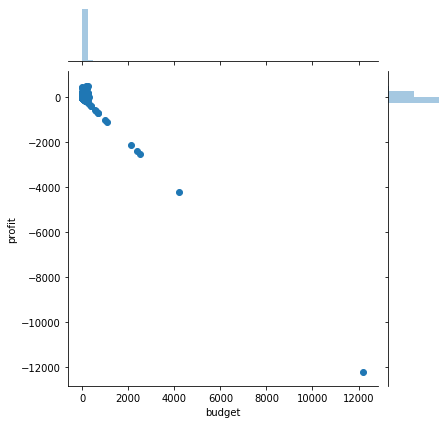

In [67]:
sns.jointplot('budget', 'profit', movies)
plt.show()

*In the scatter plot, It is not clear how the data is distributed,so we can check for profit and loss seperately*

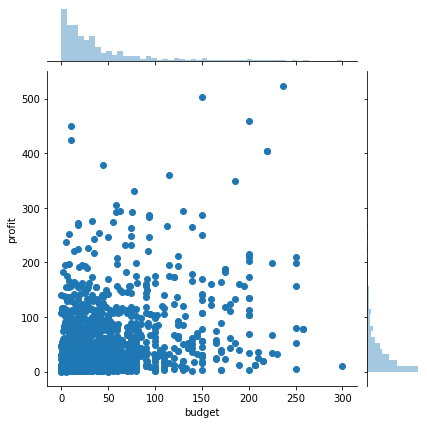

In [65]:
profitted_movies = movies[(movies.profit>0)]
sns.jointplot('budget', 'profit', profitted_movies)
plt.show()

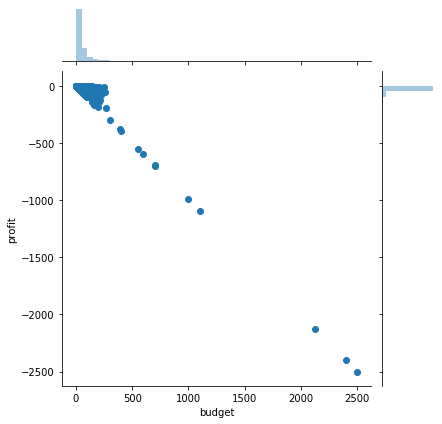

In [72]:
loss_movies = movies[(movies.profit <0) & (movies.budget <4000)]
sns.jointplot('budget','profit', loss_movies)
plt.show()

*Extract the top ten profiting movies in descending order and store them in a new dataframe - top10*

In [73]:
top10_movies = movies.head(10)

In [74]:
top10_movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45
794,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
17,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32


##### *3.3: Drop duplicate values*
*After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe*

*In the list of top 10 movies, 'The Avengers' movie is repeated. So we are clear that the dataframe contains duplicates. Remove the duplicates*

In [29]:
movies = movies.drop_duplicates(keep='first')

In [30]:
top10_movies = movies.head(10)
top10_movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45
794,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32
439,Gary Ross,673.0,408.00,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,330.00


##### *3.4: Find IMDb Top 250*

   *Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.*
   

In [31]:
IMDB_top_250 = movies[movies.num_voted_users > 25000].sort_values(by=['imdb_score'],ascending= False).head(250)

In [32]:
IMDB_top_250['Rank'] = np.arange(1, len(IMDB_top_250)+1,1)

In [33]:
IMDB_top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1937,Frank Darabont,199.0,28.34,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.34,1
3466,Francis Ford Coppola,208.0,134.82,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.82,2
2837,Francis Ford Coppola,149.0,57.30,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.30,3
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32,4
339,Peter Jackson,328.0,377.02,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.02,5


 *Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.*

In [34]:
Top_Foreign_Lang_FIlm = IMDB_top_250[IMDB_top_250['language']!= 'English']

In [35]:
Top_Foreign_Lang_FIlm

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4498,Sergio Leone,181.0,6.10,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.20,1966.0,8.9,20000,4.90,7
4029,Fernando Meirelles,214.0,7.56,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.30,2002.0,8.7,28000,4.26,15
4747,Akira Kurosawa,153.0,0.27,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.00,1954.0,8.7,11000,-1.73,17
2373,Hayao Miyazaki,246.0,10.05,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.00,2001.0,8.6,28000,-8.95,26
4921,Majid Majidi,46.0,0.93,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.18,1997.0,8.5,0,0.75,43
4259,Florian Henckel von Donnersmarck,215.0,11.28,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.00,2006.0,8.5,39000,9.28,46
1329,S.S. Rajamouli,44.0,6.50,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.03,2015.0,8.4,21000,-11.53,47
4659,Asghar Farhadi,354.0,7.10,Drama|Mystery,Shahab Hosseini,A Separation,151812,264.0,Persian,0.50,2011.0,8.4,48000,6.60,49
1298,Jean-Pierre Jeunet,242.0,33.20,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314.0,French,77.00,2001.0,8.4,39000,-43.80,52
4105,Chan-wook Park,305.0,2.18,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.00,2003.0,8.4,43000,-0.82,57


*Checkpoint 3: Spotted`Veer-Zaara` in the dataframe*

##### *3.5: Find the best directors*

*Group the dataframe using the `director_name` column. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`*

In [36]:
top10_directors = movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)

In [37]:
top10_directors

director_name
Charles Chaplin      8.600000
Tony Kaye            8.600000
Ron Fricke           8.500000
Damien Chazelle      8.500000
Majid Majidi         8.500000
Alfred Hitchcock     8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Asghar Farhadi       8.400000
Richard Marquand     8.400000
Name: imdb_score, dtype: float64

*Checkpoint 4: No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.*

##### *3.6: Find popular genres*

*You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.*

*1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`.*

In [38]:
genres_list= movies['genres'].str.split('|',n=0, expand = True)
movies['genre_1'] = genres_list[0]
movies['genre_2'] = genres_list[1]

 *Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.*

In [40]:
movies.loc[movies["genre_2"].isnull(), ["genre_2"]] = np.array(genres_list.loc[genres_list[1].isnull(), [0]] )

*2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.*

In [41]:
movies_by_segment = movies.groupby(['genre_1', 'genre_2'])

*3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.*

In [42]:
PopGenre = movies_by_segment['gross'].mean().sort_values(ascending=False).head(5)

In [43]:
PopGenre

genre_1    genre_2  
Family     Sci-Fi       434.950000
Adventure  Sci-Fi       228.628750
           Family       118.918824
           Animation    116.998462
Action     Adventure    109.595510
Name: gross, dtype: float64

*Checkpoint 5: Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!*

##### 3.7: Find the critic-favorite and audience-favorite actors

*1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.*


In [44]:
Meryl_Streep = movies[movies['actor_1_name'] == "Meryl Streep"]
Meryl_Streep.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
1408,David Frankel,208.0,124.73,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.73,Comedy,Drama
1575,Sydney Pollack,66.0,87.10,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.10,Biography,Drama
1204,Nora Ephron,252.0,94.13,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.13,Biography,Drama
1618,David Frankel,234.0,63.54,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.54,Comedy,Drama
410,Nancy Meyers,187.0,112.70,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.70,Comedy,Drama


In [45]:
Leo_Caprio = movies[movies['actor_1_name'] == "Leonardo DiCaprio"]
Leo_Caprio.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67,Drama,Romance
97,Christopher Nolan,642.0,292.57,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.57,Action,Adventure
911,Steven Spielberg,194.0,164.44,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667.0,English,52.0,2002.0,8.0,15000,112.44,Biography,Crime
296,Quentin Tarantino,765.0,162.80,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193.0,English,100.0,2012.0,8.5,199000,62.80,Drama,Western
179,Alejandro G. Iñárritu,556.0,183.64,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,48.64,Adventure,Drama


In [46]:
Brad_Pitt = movies[movies['actor_1_name'] == "Brad Pitt"]
Brad_Pitt.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
400,Steven Soderbergh,186.0,183.41,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845.0,English,85.0,2001.0,7.8,0,98.41,Crime,Thriller
255,Doug Liman,233.0,186.34,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,66.34,Action,Comedy
940,Neil Jordan,120.0,105.26,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406.0,English,60.0,1994.0,7.6,11000,45.26,Drama,Fantasy
470,David Ayer,406.0,85.71,Action|Drama|War,Brad Pitt,Fury,303185,701.0,English,68.0,2014.0,7.6,82000,17.71,Action,Drama
254,Steven Soderbergh,198.0,125.53,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,15.53,Crime,Thriller


*2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.*

In [47]:
Combined = Meryl_Streep.append(Leo_Caprio).append(Brad_Pitt)

*3. Group the combined dataframe using the `actor_1_name` column.*

In [48]:
combined_group = Combined.groupby(["actor_1_name"])

 *4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.*

In [49]:
# Critic Reviews
combined_group.num_critic_for_reviews.mean().sort_values(ascending = False)

actor_1_name
Leonardo DiCaprio    330.190476
Brad Pitt            245.000000
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

In [50]:
#User reviews
combined_group.num_user_for_reviews.mean().sort_values(ascending = False)

actor_1_name
Leonardo DiCaprio    914.476190
Brad Pitt            742.352941
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

*Checkpoint 6: `Leonardo` has aced both the lists!*

*5.Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the `title_year` year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.*

In [92]:
movies.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,decade
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51,2000
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18,2010
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67,1990
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94,1970
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45,1980
794,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28,2010
17,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28,2010
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78,1990
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54,1990
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32,2000


In [90]:
movies['decade'] = movies['title_year']//10 *10
movies['decade'] = movies['decade'].round(0).astype(int)

In [113]:
df_by_decade =  movies.groupby('decade',as_index=False).agg({'num_voted_users':'sum'}).sort_values(by='decade')

In [114]:
df_by_decade

,decade,num_voted_users
0,1920,116392
1,1930,804839
2,1940,230838
3,1950,678336
4,1960,2983442
5,1970,8681959
6,1980,20091781
7,1990,70088770
8,2000,173027465
9,2010,122448239


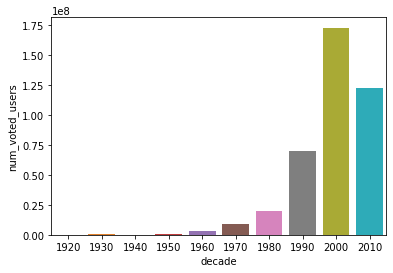

In [134]:
sns.barplot(x= 'decade',y='num_voted_users',data = df_by_decade)
plt.show()